In [109]:
import numpy as np
import pandas as pd
import rdkit
from rdkit import Chem
import warnings
warnings.filterwarnings('ignore')

In [110]:
features = ["AlogP", "Molecular_Weight", "Num_H_Acceptors", "Num_H_Donors", "Num_RotatableBonds", "LogD", "Molecular_PolarSurfaceArea"]
mlm_target = "MLM"
hlm_target = "HLM"

# load data
df = pd.read_csv("../data/train.csv")
df["AlogP"] = np.where(pd.isna(df["AlogP"]), df["LogD"], df["AlogP"])
df['mol'] = df['SMILES'].apply(lambda x : Chem.MolFromSmiles(x))
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
def canonize(mol):
    return Chem.MolToSmiles(Chem.MolFromSmiles(mol), isomericSmiles=True, canonical=True)

canon_smile = []
for molecule in df['SMILES']:
    canon_smile.append(canonize(molecule))
    
df['canon_smiles'] = canon_smile
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3498 non-null   object 
 1   SMILES                      3498 non-null   object 
 2   MLM                         3498 non-null   float64
 3   HLM                         3498 non-null   float64
 4   AlogP                       3498 non-null   float64
 5   Molecular_Weight            3498 non-null   float64
 6   Num_H_Acceptors             3498 non-null   int64  
 7   Num_H_Donors                3498 non-null   int64  
 8   Num_RotatableBonds          3498 non-null   int64  
 9   LogD                        3498 non-null   float64
 10  Molecular_PolarSurfaceArea  3498 non-null   float64
 11  mol                         3498 non-null   object 
 12  num_of_atoms                3498 non-null   int64  
 13  num_of_heavy_atoms          3498 

In [111]:
df.head()

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,mol,num_of_atoms,num_of_heavy_atoms,canon_smiles
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,<rdkit.Chem.rdchem.Mol object at 0x0000019498C...,52,28,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,<rdkit.Chem.rdchem.Mol object at 0x0000019498C...,40,21,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,<rdkit.Chem.rdchem.Mol object at 0x0000019498C...,41,22,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,<rdkit.Chem.rdchem.Mol object at 0x0000019498C...,69,35,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,<rdkit.Chem.rdchem.Mol object at 0x0000019498C...,36,20,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2


In [112]:
ind = df.index[df['canon_smiles'].duplicated()]
df = df.drop(ind)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3471 entries, 0 to 3497
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3471 non-null   object 
 1   SMILES                      3471 non-null   object 
 2   MLM                         3471 non-null   float64
 3   HLM                         3471 non-null   float64
 4   AlogP                       3471 non-null   float64
 5   Molecular_Weight            3471 non-null   float64
 6   Num_H_Acceptors             3471 non-null   int64  
 7   Num_H_Donors                3471 non-null   int64  
 8   Num_RotatableBonds          3471 non-null   int64  
 9   LogD                        3471 non-null   float64
 10  Molecular_PolarSurfaceArea  3471 non-null   float64
 11  mol                         3471 non-null   object 
 12  num_of_atoms                3471 non-null   int64  
 13  num_of_heavy_atoms          3471 non-n

In [113]:
df[df['MLM'] > 100]
df = df.drop([662,2159,2948])

In [114]:
df[df['HLM'] > 100]
df = df.drop([1092,1584,2410,2586,3157,3403])

In [115]:
feature_df = df[['MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea', 'num_of_atoms', 'num_of_heavy_atoms']]

<Axes: >

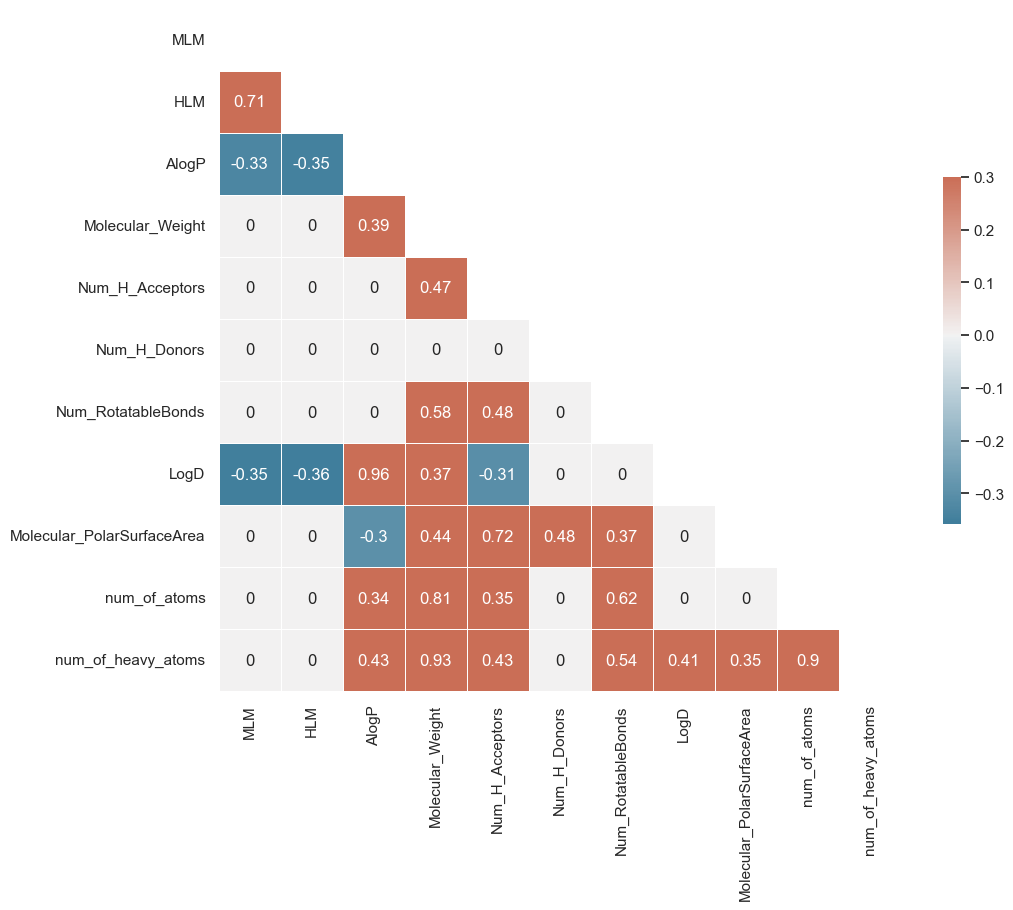

In [116]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=feature_df,
                 columns=feature_df.columns)

# Compute the correlation matrix
corr = d.corr()

corr[0.3 > abs(corr)] = 0
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

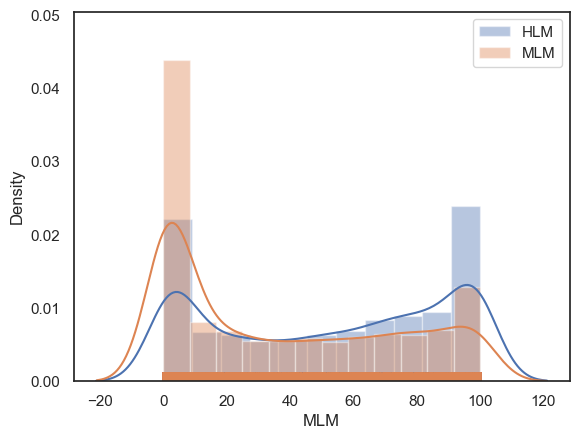

In [117]:
sns.distplot(d['HLM'], kde=True, rug=True, label='HLM')
sns.distplot(d['MLM'], kde=True, rug=True, label='MLM')
plt.legend()
plt.show()

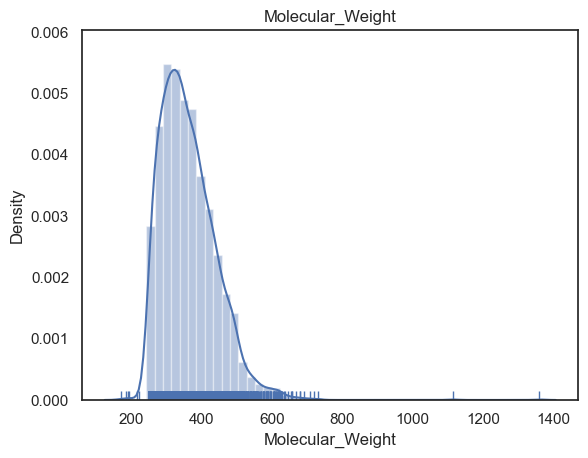

In [118]:
sns.distplot(d['Molecular_Weight'], kde=True, rug=True)
plt.title('Molecular_Weight')
plt.show()

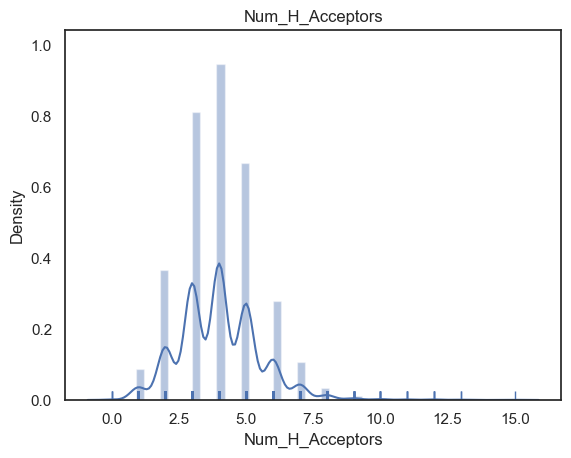

In [119]:
sns.distplot(d['Num_H_Acceptors'], kde=True, rug=True)
plt.title('Num_H_Acceptors')
plt.show()

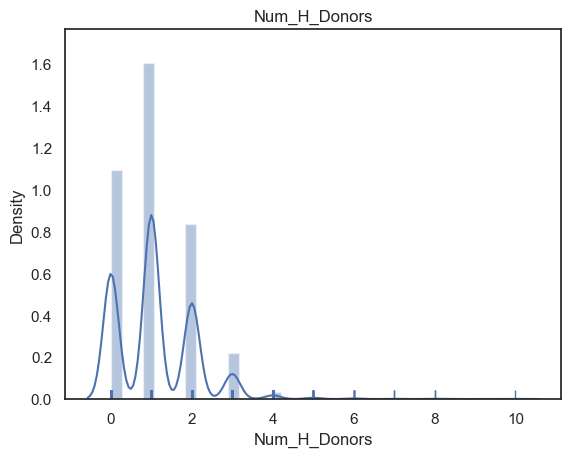

In [120]:
sns.distplot(d['Num_H_Donors'], kde=True, rug=True)
plt.title('Num_H_Donors')
plt.show()

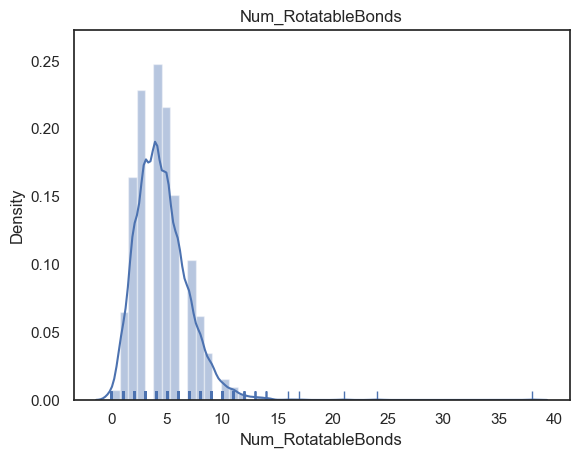

In [121]:
sns.distplot(d['Num_RotatableBonds'], kde=True, rug=True)
plt.title('Num_RotatableBonds')
plt.show()

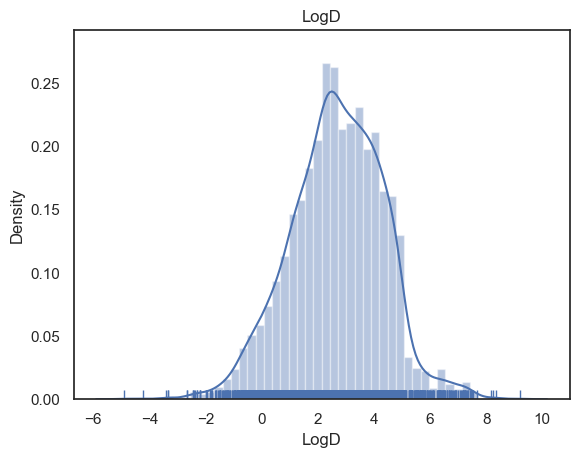

In [122]:
sns.distplot(d['LogD'], kde=True, rug=True)
plt.title('LogD')
plt.show()

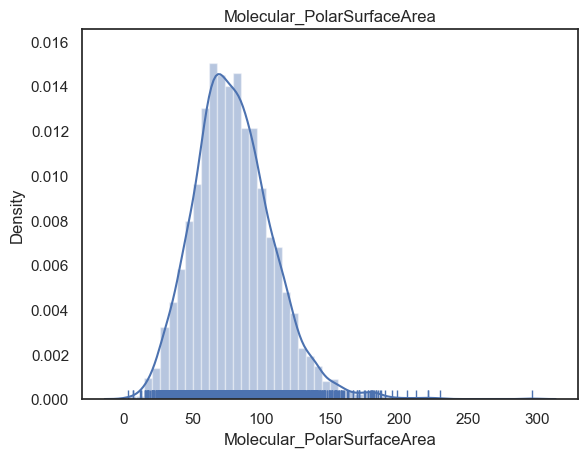

In [123]:
sns.distplot(d['Molecular_PolarSurfaceArea'], kde=True, rug=True)
plt.title('Molecular_PolarSurfaceArea')
plt.show()

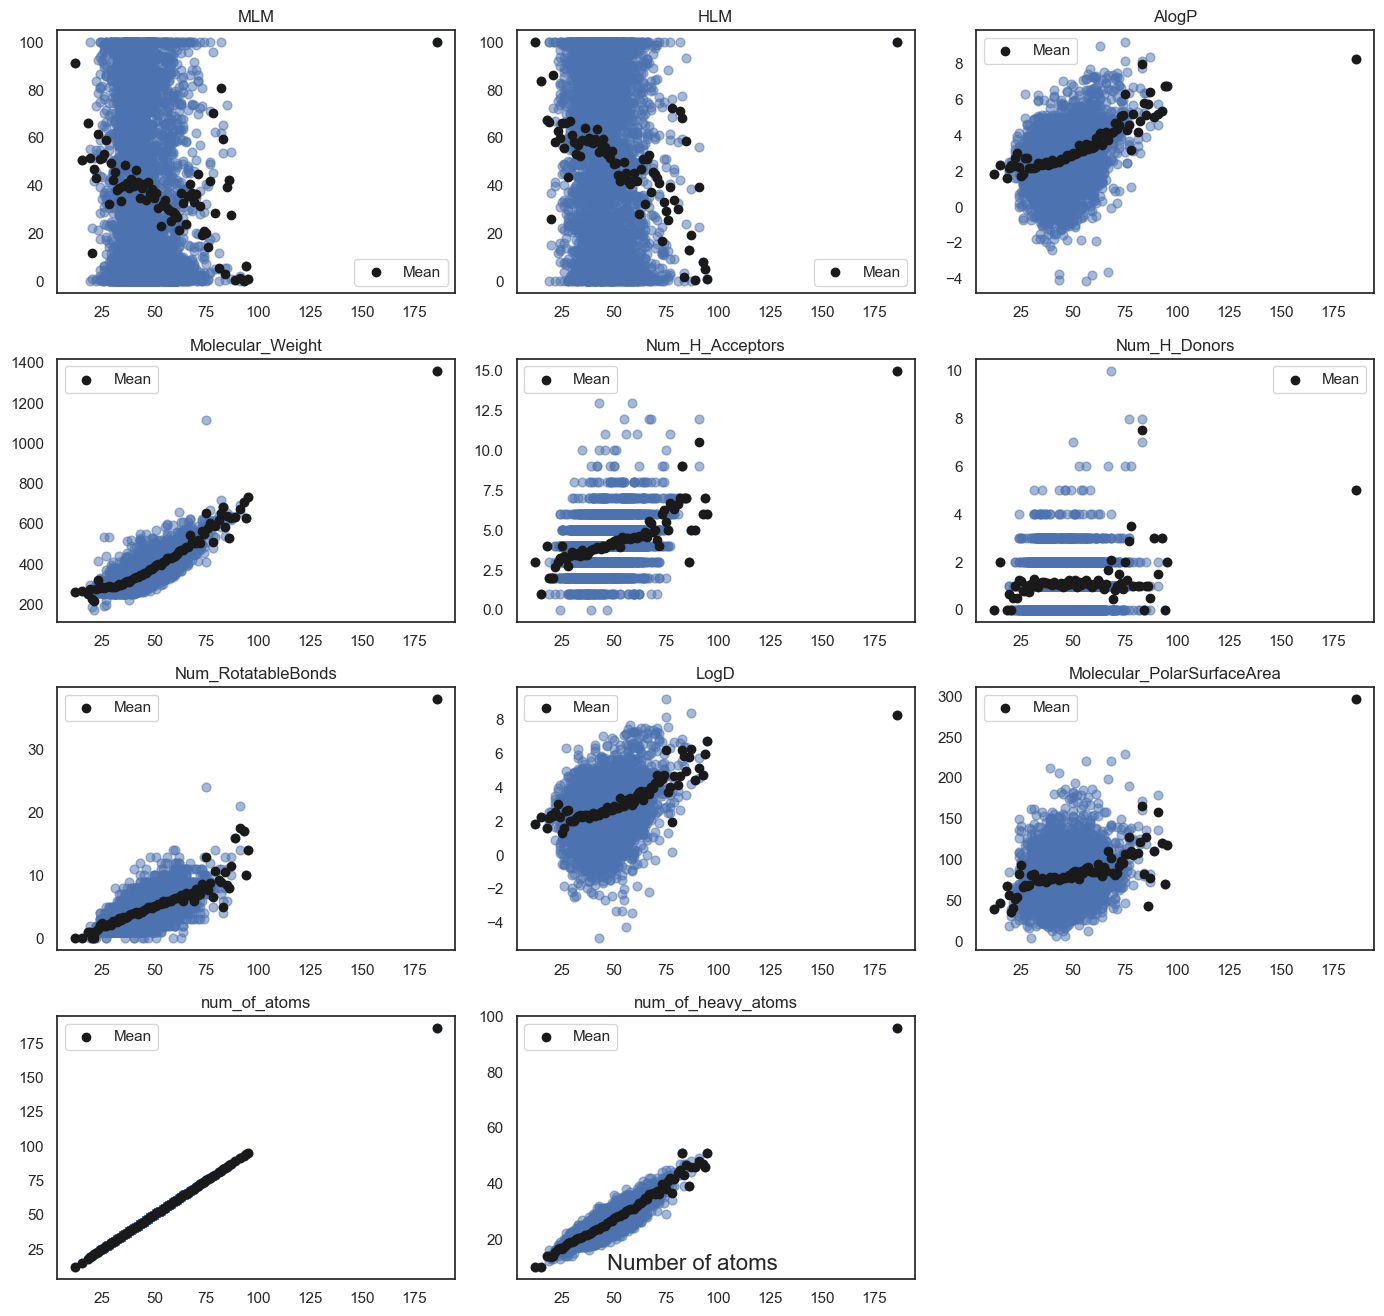

In [124]:
plt.figure(figsize=(14,20))
plot_counter = 1
for prop in d.iloc[:, :].columns:
    plt.subplot(int(np.ceil(len(d.iloc[:, :].columns)/2)), 3, plot_counter)
    plt.scatter(d['num_of_atoms'], d[prop], s=40, alpha=0.5)
    
    for atom in np.unique(d['num_of_atoms']):
        plt.scatter(atom, d[prop][d['num_of_atoms'] == atom].mean(), c='k', label='Mean')
        
    # Dictionaries can't have duplicated keys
    # This prevents repeated legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.title(prop)
    plot_counter = plot_counter + 1
    
plt.suptitle('Number of atoms', x=.5, y=0.35, ha='center', size=16) 
plt.tight_layout()
plt.show()

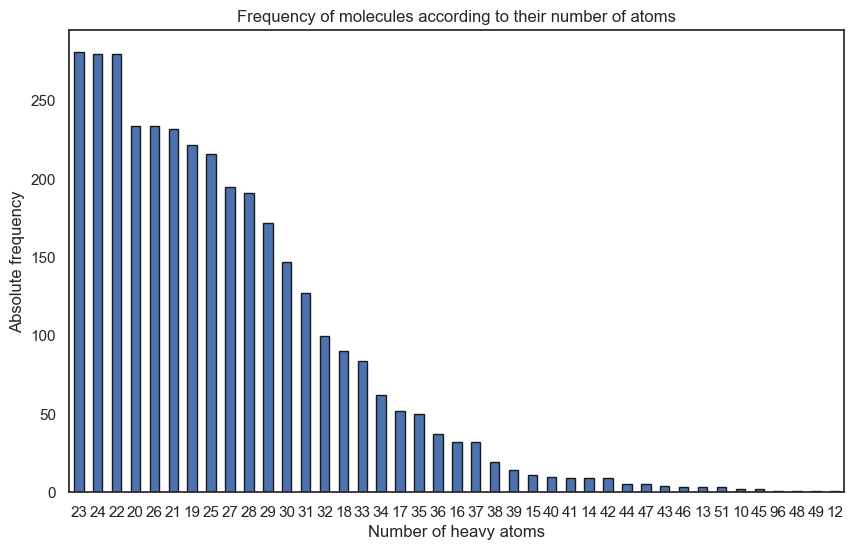

In [125]:
df['num_of_heavy_atoms'].value_counts(sort=True).plot.bar(figsize=(10,6), 
                                                     title="Frequency of molecules according to their number of atoms", 
                                                     xlabel='Number of heavy atoms',
                                                     ylabel='Absolute frequency',
                                                     rot=0,
                                                     edgecolor='k')
plt.show()

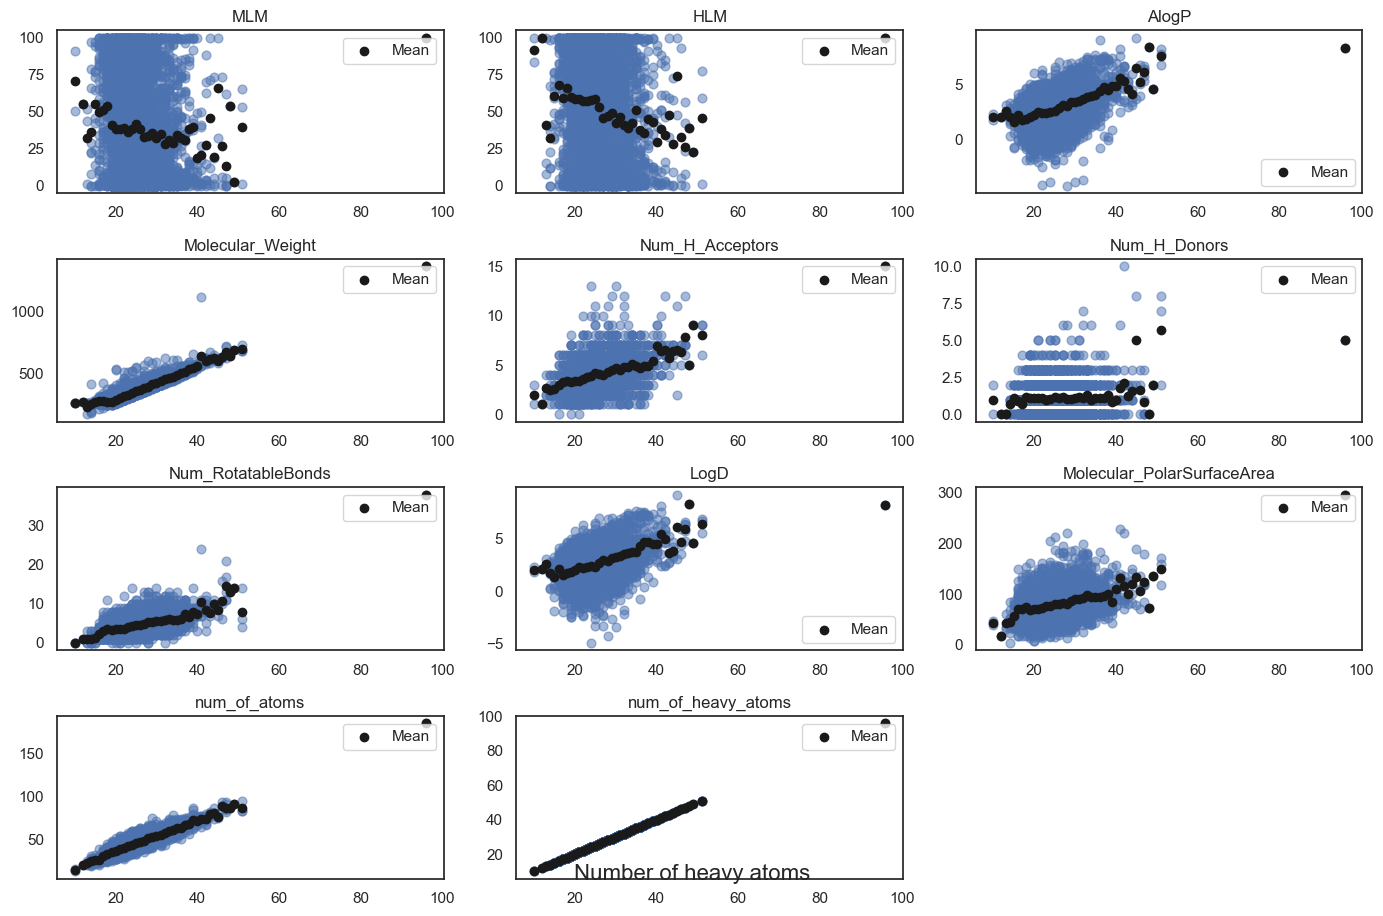

In [126]:
plt.figure(figsize=(14,14))
plot_counter = 1
for prop in d.iloc[:,:].columns:
    plt.subplot(int(np.ceil(len(d.iloc[:,:].columns)/2)), 3, plot_counter)
    plt.scatter(d['num_of_heavy_atoms'], d[prop], s=40, alpha=0.5)
    
    for atom in np.unique(d['num_of_heavy_atoms']):
        plt.scatter(atom, d[prop][d['num_of_heavy_atoms'] == atom].mean(), c='k', label='Mean')
        
    # Dictionaries can't have duplicated keys
    # This prevents repeated legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.title(prop)
    plot_counter = plot_counter + 1
    
plt.suptitle('Number of heavy atoms', x=.5, y=0.35, ha='center', size=16) 
plt.tight_layout()
plt.show()

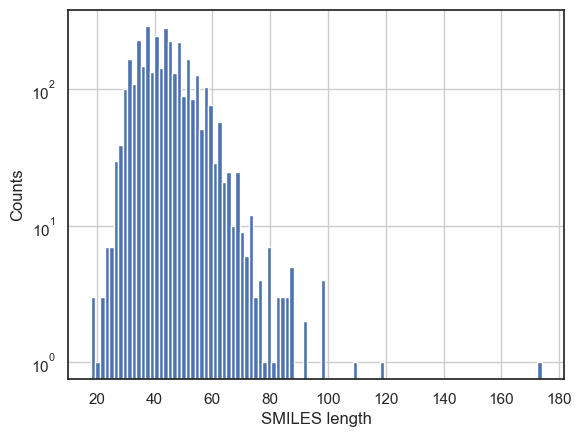

In [127]:
lengths = list(map(len, df['canon_smiles'].values))

plt.hist(lengths, bins=100)
plt.grid()
plt.xlabel('SMILES length')
plt.ylabel('Counts')
plt.yscale('log')